In [1]:
import pandas as pd 

In [8]:
#read dataframe.csv
df = pd.read_csv('../timeseries.csv')


In [9]:
df

,graph_id,edge_source,edge_dest,effca,effef,comcau,delta,delta2,delta.i1,delta.i2,...,Int3.j3,Int3.j4,Int3.j5,Int3.j6,Int3.j7,gini.delta,gini.delta2,gini.ca.ef,gini.ef.ca,is_causal
0,0,1,0,2.717888e-01,1.448283e-16,0.729792,0.000000,0.0,0.000000,0.000000,...,-0.420284,-0.420284,-0.420284,-0.420284,-0.420284,0.0,0.0,0.000000,0.097235,1
1,0,0,1,1.454447e-16,-1.238453e-16,0.243882,0.000000,0.0,0.000000,0.000000,...,-0.476511,-0.476511,-0.476511,-0.476511,-0.476511,0.0,0.0,0.097235,0.000000,0
2,0,2,0,2.248557e-01,-1.519857e-15,0.531407,0.000031,0.0,0.000031,0.000031,...,-0.420284,-0.420284,-0.420284,-0.420284,-0.420284,0.0,0.0,0.128747,0.049015,1
3,0,0,2,-1.519857e-15,-7.621445e-17,0.241974,0.000000,0.0,0.000001,0.000002,...,-0.420261,-0.420261,-0.420261,-0.420261,-0.420261,0.0,0.0,0.049015,0.128747,0
4,0,2,1,-3.898802e-16,1.496285e-17,0.059054,0.000000,0.0,0.000000,0.000000,...,-0.476511,-0.476511,-0.476511,-0.476511,-0.476511,0.0,0.0,0.175790,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,8,0,3,2.071129e-16,-4.427464e-16,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.999000,-0.999000,-0.999000,-0.999000,-0.999000,0.0,0.0,0.999000,0.999000,0
104,8,3,1,3.434902e-14,-2.196924e-01,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.999000,-0.999000,-0.999000,-0.999000,-0.999000,0.0,0.0,0.999000,0.999000,1
105,8,1,3,6.591102e-16,2.746876e-14,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.999000,-0.999000,-0.999000,-0.999000,-0.999000,0.0,0.0,0.999000,0.999000,0
106,8,3,2,-3.137217e-15,7.196618e-01,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.999000,-0.999000,-0.999000,-0.999000,-0.999000,0.0,0.0,0.999000,0.999000,1


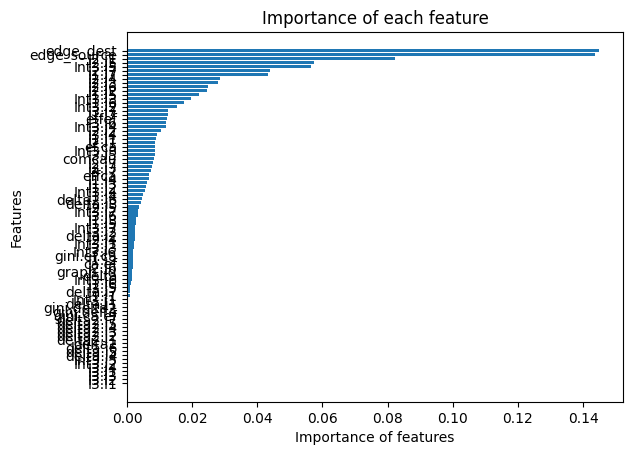

In [10]:
#use randomforest to predict class

import pandas as pd
import numpy as np
import networkx as nx
from typing import List
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#split df into train test
#train randomforest
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_causal'])
y = df['is_causal']

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X, y)

#make it a named vector

importances = regressor.feature_importances_
names = X.columns
importances, names = zip(*sorted(zip(importances, names)))

#plot
import matplotlib.pyplot as plt
plt.barh(range(len(names)), importances, align='center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()










